In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
train_data = pd.read_csv('/content/drive/MyDrive/Churn Prediction Challenge by IndabaX Tanzania/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Churn Prediction Challenge by IndabaX Tanzania/Test.csv')

print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (1077024, 19)
test data shape : (190063, 18)


In [77]:
train_data.shape, test_data.shape

((1077024, 19), (190063, 18))

In [79]:
# Inspect train Data
train_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [80]:
print(train_data.describe())
print(train_data.info())

             MONTANT  FREQUENCE_RECH        REVENUE   ARPU_SEGMENT  \
count  699139.000000   699139.000000  714669.000000  714669.000000   
mean     5529.210895       11.523756    5506.050798    1835.355961   
std      7104.737952       13.261938    7175.625010    2391.870902   
min        20.000000        1.000000       1.000000       0.000000   
25%      1000.000000        2.000000    1000.000000     333.000000   
50%      3000.000000        7.000000    3000.000000    1000.000000   
75%      7350.000000       16.000000    7360.000000    2453.000000   
max    470000.000000      131.000000  532177.000000  177392.000000   

           FREQUENCE   DATA_VOLUME         ON_NET         ORANGE  \
count  714669.000000  5.472610e+05  683850.000000  629880.000000   
mean       13.974439  3.368802e+03     277.065798      95.160804   
std        14.687059  1.289893e+04     874.315378     203.020261   
min         1.000000  0.000000e+00       0.000000       0.000000   
25%         3.000000  0.00000

In [81]:
# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64


In [82]:
#Encode the TENURE column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data["TENURE"] = encoder.fit_transform(train_data["TENURE"])
test_data["TENURE"] = encoder.transform(test_data["TENURE"])

In [83]:
#Fill Nan for Train

train_data['MONTANT'].fillna((train_data['MONTANT'].mean()), inplace=True)
train_data['FREQUENCE_RECH'].fillna((train_data['FREQUENCE_RECH'].mean()), inplace=True)
train_data['REVENUE'].fillna((train_data['REVENUE'].mean()), inplace=True)
train_data['ARPU_SEGMENT'].fillna((train_data['ARPU_SEGMENT'].mean()), inplace=True)
train_data['FREQUENCE'].fillna((train_data['FREQUENCE'].mean()), inplace=True)
train_data['DATA_VOLUME'].fillna((train_data['DATA_VOLUME'].mean()), inplace=True)
train_data['ON_NET'].fillna((train_data['ON_NET'].mean()), inplace=True)
train_data['ORANGE'].fillna((train_data['ORANGE'].mean()), inplace=True)
train_data['TIGO'].fillna((train_data['TIGO'].mean()), inplace=True)
train_data['ZONE1'].fillna((train_data['ZONE1'].mean()), inplace=True)
train_data['ZONE2'].fillna((train_data['ZONE2'].mean()), inplace=True)
train_data['FREQ_TOP_PACK'].fillna((train_data['FREQ_TOP_PACK'].mean()), inplace=True)


In [84]:
#Fill Nan for Test

test_data['MONTANT'].fillna((test_data['MONTANT'].mean()), inplace=True)
test_data['FREQUENCE_RECH'].fillna((test_data['FREQUENCE_RECH'].mean()), inplace=True)
test_data['REVENUE'].fillna((test_data['REVENUE'].mean()), inplace=True)
test_data['ARPU_SEGMENT'].fillna((test_data['ARPU_SEGMENT'].mean()), inplace=True)
test_data['FREQUENCE'].fillna((test_data['FREQUENCE'].mean()), inplace=True)
test_data['DATA_VOLUME'].fillna((test_data['DATA_VOLUME'].mean()), inplace=True)
test_data['ON_NET'].fillna((test_data['ON_NET'].mean()), inplace=True)
test_data['ORANGE'].fillna((test_data['ORANGE'].mean()), inplace=True)
test_data['TIGO'].fillna((test_data['TIGO'].mean()), inplace=True)
test_data['ZONE1'].fillna((test_data['ZONE1'].mean()), inplace=True)
test_data['ZONE2'].fillna((test_data['ZONE2'].mean()), inplace=True)
test_data['FREQ_TOP_PACK'].fillna((test_data['FREQ_TOP_PACK'].mean()), inplace=True)
test_data['TOP_PACK'].fillna((test_data['FREQ_TOP_PACK'].mean()), inplace=True)

In [85]:
# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: user_id                0
REGION            424337
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK          450895
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64


In [86]:
# Check for missing values
print('missing values:', test_data.isnull().sum())

missing values: user_id               0
REGION            74733
TENURE                0
MONTANT               0
FREQUENCE_RECH        0
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
DATA_VOLUME           0
ON_NET                0
ORANGE                0
TIGO                  0
ZONE1                 0
ZONE2                 0
MRG                   0
REGULARITY            0
TOP_PACK              0
FREQ_TOP_PACK         0
dtype: int64


In [87]:
#Drop columns
test_data.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)
train_data.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

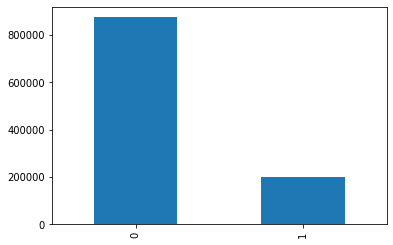

In [88]:
# Target distribution
train_data.CHURN.value_counts().plot(kind='bar')

In [89]:
#Separate training features from target
dropcols = ['user_id', 'CHURN']
X_train = train_data.drop(columns=dropcols, axis=1)
y_train = train_data['CHURN']

X_test = test_data.drop(['user_id'], axis=1)
test = test_data.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting


In [90]:
#Encode the TENURE column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

X_test["TENURE"] = encoder.transform(X_test["TENURE"])

test['TENURE'] = encoder.transform(test["TENURE"])

In [91]:
#rescale X_train and X_test
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [92]:
train_data.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,7,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,7,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,7,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,7,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61,7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,7,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56,11.000000,0


In [93]:
X_train_rescaled.shape

(1077024, 14)

In [94]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_rescaled, y_train, stratify = y_train, test_size = 0.5, random_state=1)

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
# fit and Evaluate model

my_model = XGBClassifier()
my_model.fit(X_Train, y_Train)
y_pred = my_model.predict(X_val)

# Get error rate
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, y_val)

Error rate of Random Forest classifier:  0.13522632736132156


array([[409120,  44426],
       [ 28395,  56571]])

In [96]:
# # # Print default setting
# my_model.get_params()

In [97]:
# Get the predicted result for the test Data
test_data.CHURN = my_model.predict(X_test_rescaled)

<ipython-input-97-2c4b5e97077d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_data.CHURN = my_model.predict(X_test_rescaled)


In [98]:
# create submission DataFrame
submission_df3 = pd.DataFrame({"user_id": test_data["user_id"], "CHURN": test_data.CHURN})

In [99]:
submission_df3.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,1
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,1
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [101]:
# Create submission csv file
submission_df3.to_csv('SubFile_10.49am.csv', index = False)